In [ ]:
#          PROVIDERS & BACKENDS   #############################################################
# Qiskit includes interfaces to two providers:
# Aer: access to several simulators included with Qiskit and run on your local machine
# IBMQ: access to cloud-based backends — simulators and real quantum devices — hosted on IBM Q
# https://medium.com/qiskit/qiskit-backends-what-they-are-and-how-to-work-with-them-fb66b3bd0463

from qiskit import IBMQ
from qiskit import Aer
from qiskit import *

# IBMQ.update_account()

IBMQ.load_account()

print ("IBMQ providers: ")
for provider in IBMQ.providers():
    print(provider)


In [2]:
print ("IBMQ backends: ")
for backend in provider.backends():
    print(backend.name())

IBMQ backends: 
ibmq_qasm_simulator
ibmqx2
ibmq_16_melbourne
ibmq_vigo
ibmq_ourense
ibmq_valencia
ibmq_armonk
ibmq_athens
ibmq_santiago


In [3]:
melbourne = provider.get_backend('ibmq_16_melbourne')

# The name of the backend
print ("--------- Melbourne name: ")
melbourne_name = melbourne.name()
print(melbourne_name)

--------- Melbourne name: 
ibmq_16_melbourne


In [4]:
# A dictionary of backend specific properties
print ("--------- Melbourne properties: ")
melbourne_properties = melbourne.properties()
# print(melbourne_properties)

--------- Melbourne properties: 


In [5]:
# Part of the configuration is the coupling map
print ("--------- Melbourne coupling map: ")
melbourne_coupling_map = melbourne.configuration().coupling_map
print(melbourne_coupling_map)

--------- Melbourne coupling map: 
[[0, 1], [0, 14], [1, 0], [1, 2], [1, 13], [2, 1], [2, 3], [2, 12], [3, 2], [3, 4], [3, 11], [4, 3], [4, 5], [4, 10], [5, 4], [5, 6], [5, 9], [6, 5], [6, 8], [7, 8], [8, 6], [8, 7], [8, 9], [9, 5], [9, 8], [9, 10], [10, 4], [10, 9], [10, 11], [11, 3], [11, 10], [11, 12], [12, 2], [12, 11], [12, 13], [13, 1], [13, 12], [13, 14], [14, 0], [14, 13]]


In [6]:
# status(): A dictionary of the backend’s status, such as how many jobs it has queued
print ("--------- Melbourne status: ")

status = melbourne.status()
is_operational = status.operational
jobs_in_queue = status.pending_jobs

print(is_operational)
print(jobs_in_queue)

--------- Melbourne status: 
True
21


In [7]:
# construct a noise model to mimic the noise of the melbourne device 
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel

emulator = Aer.get_backend('qasm_simulator')

noise_model = NoiseModel.from_backend(melbourne)
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'u2', 'u3']
  Instructions with noise: ['measure', 'u3', 'u2', 'cx', 'id']
  Qubits with noise: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
  Specific qubit errors: [('id', [0]), ('id', [1]), ('id', [2]), ('id', [3]), ('id', [4]), ('id', [5]), ('id', [6]), ('id', [7]), ('id', [8]), ('id', [9]), ('id', [10]), ('id', [11]), ('id', [12]), ('id', [13]), ('id', [14]), ('u2', [0]), ('u2', [1]), ('u2', [2]), ('u2', [3]), ('u2', [4]), ('u2', [5]), ('u2', [6]), ('u2', [7]), ('u2', [8]), ('u2', [9]), ('u2', [10]), ('u2', [11]), ('u2', [12]), ('u2', [13]), ('u2', [14]), ('u3', [0]), ('u3', [1]), ('u3', [2]), ('u3', [3]), ('u3', [4]), ('u3', [5]), ('u3', [6]), ('u3', [7]), ('u3', [8]), ('u3', [9]), ('u3', [10]), ('u3', [11]), ('u3', [12]), ('u3', [13]), ('u3', [14]), ('cx', [0, 1]), ('cx', [0, 14]), ('cx', [1, 0]), ('cx', [1, 2]), ('cx', [1, 13]), ('cx', [2, 1]), ('cx', [2, 3]), ('cx', [2, 12]), ('cx', [3, 2]), ('cx', [3, 4]), ('cx', [3, 11]), ('cx', 

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
x q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];



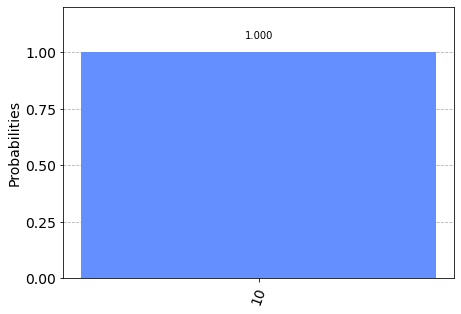

In [8]:
qc = QuantumCircuit(2,2)
qc.x(1)
qc.measure(0,0)
qc.measure(1,1)

print(qc.qasm())

job = execute(qc, emulator, shots=1024)
histogram = job.result().get_counts()
plot_histogram( histogram )

{'10': 1024}
{'00': 66, '10': 952, '11': 6}


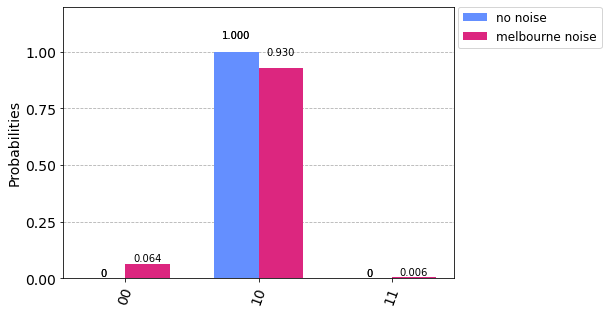

In [9]:
job2 = execute(qc, emulator, shots=1024, noise_model=noise_model,
coupling_map=melbourne_coupling_map,
basis_gates=noise_model.basis_gates)

histogram2 = job2.result().get_counts()
legend = ['no noise', 'melbourne noise']

print (histogram)
print (histogram2)

plot_histogram([histogram, histogram2],legend=legend)